##### This is a comprehensive data exploration of a Nova Scotia sold houses dataset.

### Data Exploration

In [472]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.decomposition import PCA
import matplotlib.cm as cm
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [473]:
df=pd.DataFrame(pd.read_csv("soldhouses_dartmouth.csv"))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 410 entries, 0 to 409
Data columns (total 61 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   listings/id                        410 non-null    int64  
 1   listings/pix_cache_id              410 non-null    object 
 2   listings/listing_id                410 non-null    int64  
 3   listings/class_id                  410 non-null    int64  
 4   listings/status_id                 410 non-null    int64  
 5   listings/list_price                410 non-null    int64  
 6   listings/sold_price                410 non-null    int64  
 7   listings/close_dt                  399 non-null    object 
 8   listings/list_dt                   410 non-null    object 
 9   listings/sold_dt                   410 non-null    object 
 10  listings/status_dt                 410 non-null    object 
 11  listings/update_dt                 410 non-null    object 

In [474]:
#dropping columns I don't need them
df=df.drop(columns=['listings/id','listings/pix_cache_id', 'listings/listing_id',
       'listings/class_id', 'listings/status_id',
        'listings/status_dt', 'listings/update_dt',
        'listings/civicnum', 
        'listings/pix_count',
       'listings/st_type',  'listings/address', 'listings/pid',
       'listings/pid2', 'listings/parcel_class_id', 'listings/idx_optin',
       'listings/is_vp', 'listings/is_vp_sold', 'listings/listing_b1',
       'listings/listing_b2', 'listings/has_energy', 'listings/is_following',
       'properties/id', 'properties/class_id', 'properties/apartment',
        'properties/area_unit', 'properties/assessment',
       'properties/city', 'properties/civicchar', 'properties/civicnum',
       'properties/lat', 'properties/lng', 'properties/parcel_type',
       'properties/pid', 'properties/polygons/0/points',
       'properties/polygons/0/zoom_factor', 'properties/ppid',
       'properties/shape_pid', 'properties/st_type', 'properties/street',
       'properties/history', 'properties/has_energy',
       'properties/is_following', 'listings/nhalfbaths','properties/area','listings/apartment', 'listings/street','listings/close_dt','listings/list_dt'])

In [475]:
#Statistics summary of dataset
df.describe()

,listings/list_price,listings/sold_price,listings/tla,listings/mla,listings/pid3,listings/pid4,listings/nbeds,listings/nfullbaths,listings/oh,properties/polygons/0/levels,properties/polygons/0/num_points
count,410.000000,410.000000,386.000000,386.000000,0.0,0.0,386.000000,386.000000,0.0,0.0,0.0
mean,311337.341463,357111.002439,1786.888601,1203.911917,NaN,NaN,3.204663,1.590674,NaN,NaN,NaN
std,70508.737259,78988.116156,464.159669,329.400861,NaN,NaN,0.764185,0.588475,NaN,NaN,NaN
min,69900.000000,55000.000000,572.000000,0.000000,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN
25%,259900.000000,301250.000000,1471.500000,980.500000,NaN,NaN,3.000000,1.000000,NaN,NaN,NaN
50%,309450.000000,363250.000000,1800.000000,1140.000000,NaN,NaN,3.000000,2.000000,NaN,NaN,NaN
75%,359900.000000,420000.000000,2064.750000,1401.000000,NaN,NaN,4.000000,2.000000,NaN,NaN,NaN
max,482500.000000,500000.000000,3440.000000,2440.000000,NaN,NaN,5.000000,3.000000,NaN,NaN,NaN


In [476]:
# dropping missing values 
df=df.dropna(1,how='all')
df.isna().sum()

C:\Users\renata\AppData\Local\Temp/ipykernel_8920/1107937156.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  df=df.dropna(1,how='all')


listings/list_price     0
listings/sold_price     0
listings/sold_dt        0
listings/tla           24
listings/mla           24
listings/city           0
listings/nbeds         24
listings/nfullbaths    24
dtype: int64

In [477]:
df['listings/mla'].fillna(int(df['listings/mla'].mean()), inplace=True)
df['listings/tla'].fillna(int(df['listings/tla'].mean()), inplace=True)
df['listings/nbeds'].fillna(int(df['listings/nbeds'].mean()), inplace=True)
df['listings/nfullbaths'].fillna(int(df['listings/nfullbaths'].mean()), inplace=True)

In [478]:
#changing datatypes
df['listings/sold_dt'] = pd.to_datetime(df['listings/sold_dt'])

In [479]:
df.describe()

,listings/list_price,listings/sold_price,listings/tla,listings/mla,listings/nbeds,listings/nfullbaths
count,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000
mean,311337.341463,357111.002439,1786.836585,1203.858537,3.192683,1.556098
std,70508.737259,78988.116156,450.335474,319.590263,0.742984,0.587585
min,69900.000000,55000.000000,572.000000,0.000000,0.000000,0.000000
25%,259900.000000,301250.000000,1515.500000,988.500000,3.000000,1.000000
50%,309450.000000,363250.000000,1786.000000,1154.500000,3.000000,2.000000
75%,359900.000000,420000.000000,2045.000000,1358.250000,4.000000,2.000000
max,482500.000000,500000.000000,3440.000000,2440.000000,5.000000,3.000000


### BOXPLOT

<AxesSubplot:ylabel='listings/sold_price'>

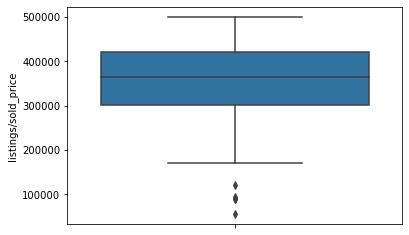

In [480]:
sns.boxplot(y=df['listings/sold_price'])

<AxesSubplot:ylabel='listings/mla'>

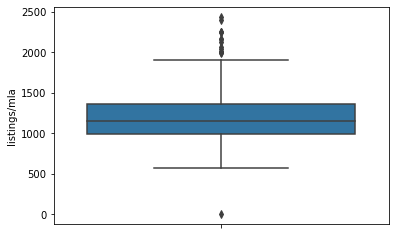

In [481]:
sns.boxplot(y=df['listings/mla'])

### Dealing with Outliers

In [482]:
def outlierdetect(col):
    sorted(col)
    Q1 = np.percentile(col, 25)
    Q3 = np.percentile(col, 75)
    IQR = Q3-Q1
    lower_bound = Q1 -(1.5 *IQR)
    upper_bound = Q3 +(1.5 *IQR)
    return lower_bound, upper_bound

In [483]:
lower_bound, upper_bound = outlierdetect(df['listings/sold_price'])
df =   df[(df['listings/sold_price'] > lower_bound) & (df['listings/sold_price'] < upper_bound)]

In [484]:
lower_bound, upper_bound = outlierdetect(df['listings/mla'])
df =  df[(df['listings/mla'] > lower_bound) & (df['listings/mla'] < upper_bound)]

In [485]:
lower_bound, upper_bound = outlierdetect(df['listings/tla'])
df =  df[(df['listings/tla'] > lower_bound) & (df['listings/tla'] < upper_bound)]

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


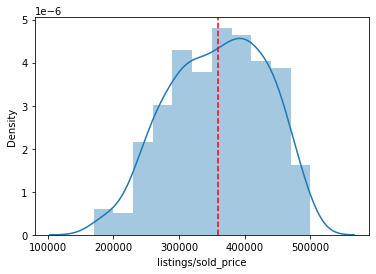

In [486]:
sns.distplot(df['listings/sold_price']);
x=np.mean(df['listings/sold_price'])
plt.axvline(x,c = 'red', ls = '--', label = 'mean')

In [487]:
#skewness and kurtosis
print("Skewness: %f" % df['listings/sold_price'].skew())
print("Kurtosis: %f" % df['listings/sold_price'].kurt())

Skewness: -0.215945
Kurtosis: -0.727818


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


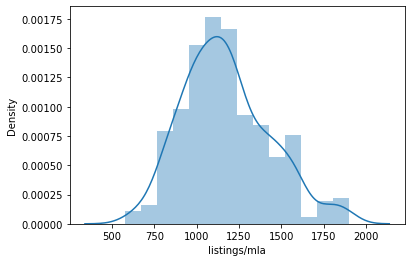

In [488]:
sns.distplot(df['listings/mla']);

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


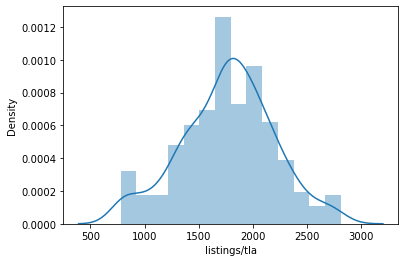

In [489]:
sns.distplot(df['listings/tla']);

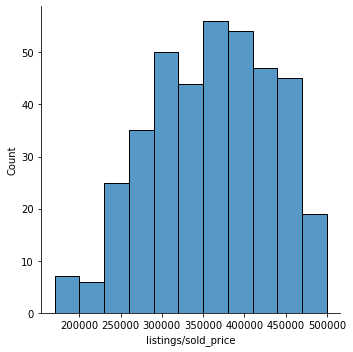

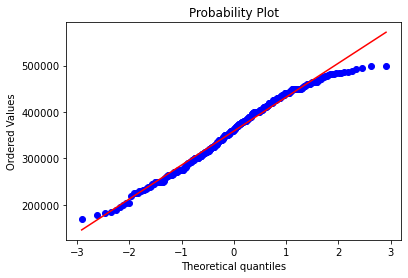

In [490]:
#check if fits
sns.displot(df['listings/sold_price'])
fig=plt.figure()
res=stats.probplot(df['listings/sold_price'], plot=plt)

In [491]:
# encode city column
df['city_code'] = df['listings/city'].map({'Dartmouth':1, 'Portland Hills':2, 'Cole Harbour':3, 'Colby Village':4,
       'Russell Lake':5, 'Woodlawn':6, 'Colby':7, 'Halifax':8, 'Forest Hills':9,
       'Westphal':10, 'Nantucket':11})

### Correlation Matrix

Text(0.5, 1.0, 'Correlation Heatmap')

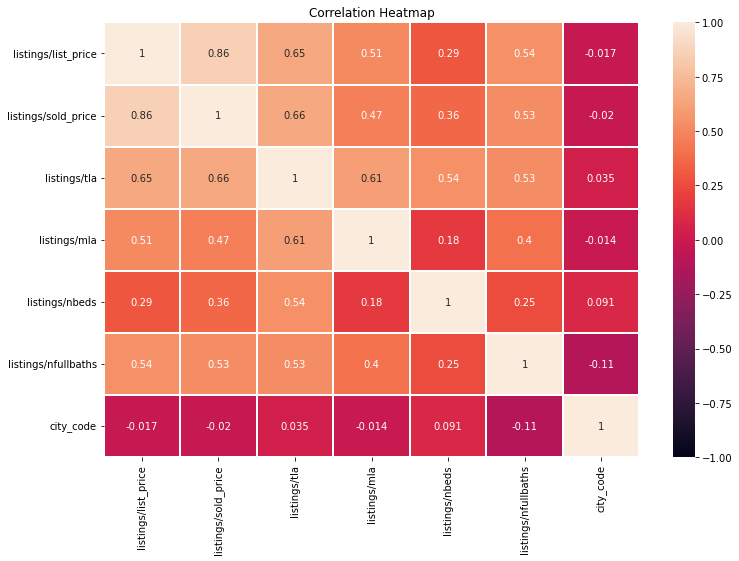

In [492]:
%matplotlib inline
f,ax1 = plt.subplots(figsize = (12,8))

pt = df.corr()
sns.heatmap(pt,linewidths = 0.05,ax = ax1,vmax=1,vmin=-1,annot=True)
ax1.set_title('Correlation Heatmap')

### Scaling

In [493]:
df

,listings/list_price,listings/sold_price,listings/sold_dt,listings/tla,listings/mla,listings/city,listings/nbeds,listings/nfullbaths,city_code
1,269900,275000,2021-01-20,2140.0,960.0,Dartmouth,3.0,1.0,1
4,409900,449000,2021-01-21,2638.0,1786.0,Dartmouth,3.0,3.0,1
5,239900,257500,2021-01-19,1632.0,1237.0,Dartmouth,2.0,2.0,1
6,249900,252500,2021-01-21,986.0,986.0,Dartmouth,2.0,1.0,1
7,279000,315300,2021-01-26,1300.0,990.0,Dartmouth,4.0,1.0,1
...,...,...,...,...,...,...,...,...,...
405,384000,431303,2021-12-23,1535.0,1535.0,Dartmouth,2.0,2.0,1
406,340000,375000,2022-01-03,1700.0,1040.0,Dartmouth,4.0,1.0,1
407,349900,360000,2021-12-22,2253.0,1164.0,Cole Harbour,5.0,1.0,3
408,309000,478000,2022-01-04,2390.0,1296.0,Dartmouth,4.0,2.0,1


In [494]:
X=df.drop(columns=['listings/list_price','listings/sold_price', 'listings/sold_dt', 'listings/city', 'city_code'])
y= df['listings/sold_price']

In [495]:
std = StandardScaler()
s = std.fit_transform(X)

### PCA

In [496]:
pca = PCA(n_components=2)
modelX = pca.fit_transform(s)
modelX

array([[-4.54195528e-01,  5.21285906e-01],
       [ 3.49258096e+00, -1.97998323e+00],
       [-3.77937562e-01, -1.71944747e+00],
       [-2.60399279e+00, -8.50789614e-01],
       [-1.00658966e+00,  1.45341933e+00],
       [ 7.75238288e-02, -1.15016838e-03],
       [-1.26263507e+00,  2.17365564e-01],
       [-9.55113616e-02, -4.80108240e-01],
       [-4.93095851e-01, -1.16320796e-02],
       [ 1.16895372e+00, -1.13368570e+00],
       [-1.22974856e+00,  1.42965765e-01],
       [ 1.43213189e+00,  7.55476396e-01],
       [-1.38442441e+00,  1.61714432e-01],
       [-3.18177840e-01, -1.99940344e-01],
       [ 1.39521439e+00,  8.72886106e-01],
       [-1.27843123e+00,  1.15491059e-01],
       [ 1.35888840e+00,  8.22949898e-01],
       [ 1.55824155e+00,  7.22492897e-01],
       [-1.53608694e+00,  4.46073753e-01],
       [-3.10552470e-01, -2.12244194e+00],
       [ 1.50902513e+00, -8.89085452e-01],
       [-8.65355633e-01, -3.51161011e-01],
       [-7.23023742e-01, -1.89923226e+00],
       [ 6.

In [497]:
pca.components_
pca.explained_variance_ratio_

array([0.5718648 , 0.21282054])

In [498]:
range_n_clusters = [2, 3, 4, 5, 6, 7]
for n_clusters in range_n_clusters:

    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(modelX)

    silhouette_avg = silhouette_score(modelX, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(modelX, cluster_labels)

For n_clusters = 2 The average silhouette_score is : 0.4347282684390585
For n_clusters = 3 The average silhouette_score is : 0.45020394262083546
For n_clusters = 4 The average silhouette_score is : 0.42285617872075926
For n_clusters = 5 The average silhouette_score is : 0.4316561990490143
For n_clusters = 6 The average silhouette_score is : 0.452301906935103
For n_clusters = 7 The average silhouette_score is : 0.48757197551945414


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


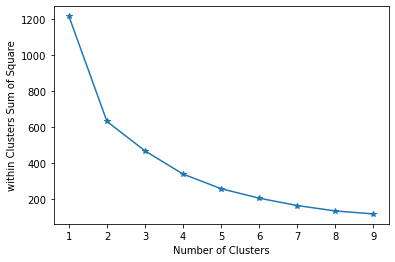

In [499]:
# number of clusters
inertia_lst = []
for num in range(1,10):
    km = KMeans(n_clusters=num)
    km.fit(modelX)
    # adding intertia values for each cluster to list using append
    inertia_lst.append(km.inertia_)

plt.plot(range(1,10), inertia_lst, marker='*')
plt.xlabel("Number of Clusters")
plt.ylabel("within Clusters Sum of Square")
plt.show()

### Silhouete analysis

For n_clusters = 2 The average silhouette_score is : 0.4347282684390585
For n_clusters = 3 The average silhouette_score is : 0.44895279050246206
For n_clusters = 4 The average silhouette_score is : 0.42285617872075926
For n_clusters = 5 The average silhouette_score is : 0.4316561990490143
For n_clusters = 6 The average silhouette_score is : 0.4510704042215053


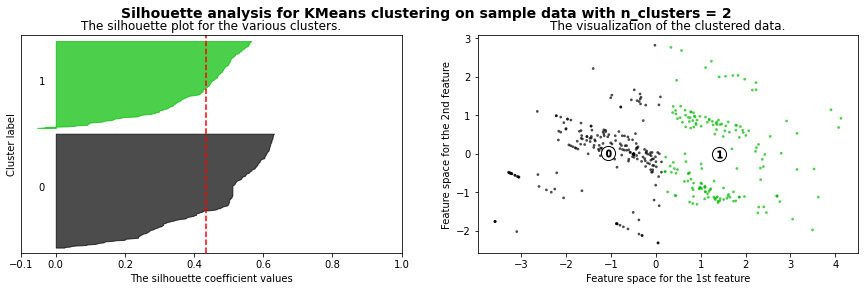

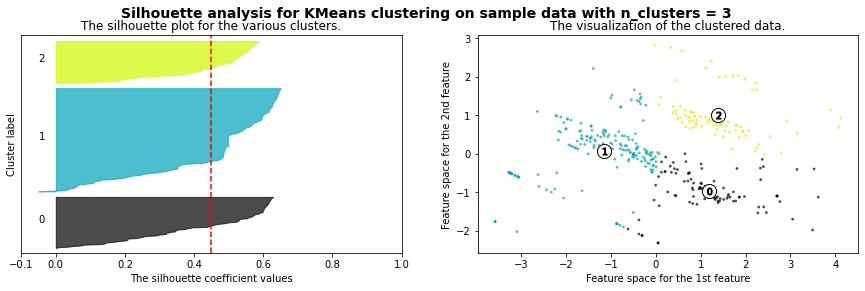

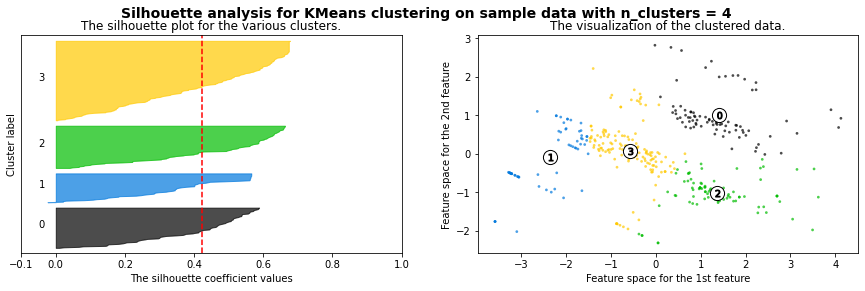

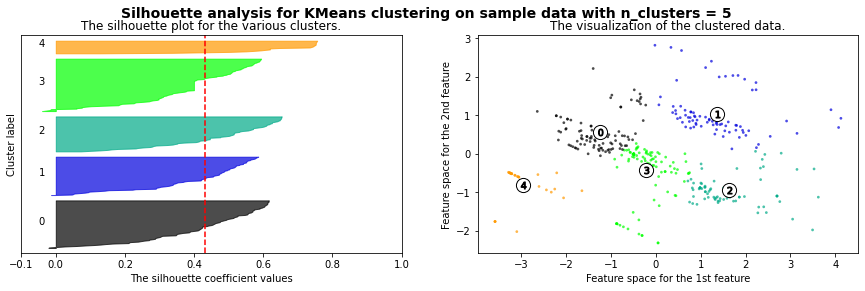

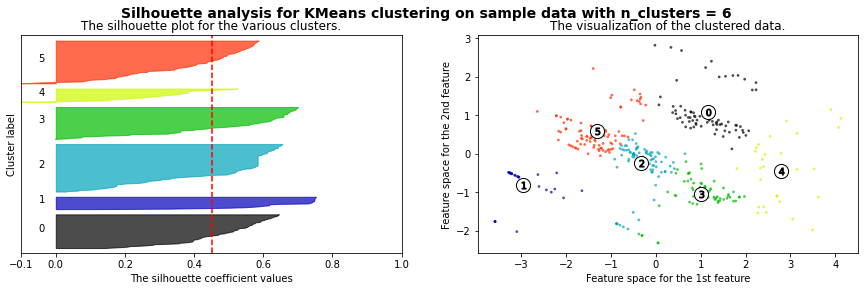

In [500]:
#K-Means model on the scaled data
#data_sliced2 = df[['listings/sold_price','listings/mla', 'listings/nfullbaths']]


range_n_clusters = [2, 3, 4, 5, 6]
silhouette_avg_n_clusters = []

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(15, 4)

    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(modelX) + (n_clusters + 1) * 10])
    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = clusterer.fit_predict(modelX)

    silhouette_avg = silhouette_score(modelX, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    
    sample_silhouette_values = silhouette_samples(modelX, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )
        
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10 

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")     
        
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    
    
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        modelX[:, 0], modelX[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )
    
    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )
    
    
    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

In [501]:
### Train K-Means

In [502]:
X_train, X_test, y_train,y_test = train_test_split(X, y,test_size=0.3,random_state=0)

In [503]:
X_train

,listings/tla,listings/mla,listings/nbeds,listings/nfullbaths
75,1572.0,936.0,3.0,1.0
234,784.0,784.0,2.0,1.0
164,1951.0,1023.0,3.0,1.0
17,1325.0,1075.0,3.0,1.0
110,2062.0,1742.0,4.0,2.0
...,...,...,...,...
343,2129.0,1126.0,4.0,2.0
204,2415.0,1269.0,4.0,2.0
128,2153.0,1212.0,3.0,1.0
55,1716.0,1144.0,3.0,1.0


In [504]:
kmeans = KMeans(n_clusters=6)
kmeans.fit(X_train) #fit model
labels = kmeans.predict(X_train)

X_train['outcomes'] = labels
#adding the labels/outcomes or cluster number to the original dataset


C:\Users\renata\AppData\Local\Temp/ipykernel_8920/1348011053.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['outcomes'] = labels


In [505]:
X_train['outcomes'].value_counts()

2    76
1    54
0    42
3    37
4    31
5    31
Name: outcomes, dtype: int64

In [506]:
kmeans.inertia_

9747770.114173412

In [507]:
kmeans.cluster_centers_

array([[2.09754762e+03, 1.13166667e+03, 3.88095238e+00, 1.76190476e+00],
       [1.38794444e+03, 1.04209259e+03, 2.98148148e+00, 1.27777778e+00],
       [1.75515789e+03, 1.08528947e+03, 3.27631579e+00, 1.39473684e+00],
       [1.93186486e+03, 1.49678378e+03, 3.18918919e+00, 1.81081081e+00],
       [9.25516129e+02, 8.80935484e+02, 2.12903226e+00, 1.03225806e+00],
       [2.43416129e+03, 1.46187097e+03, 3.45161290e+00, 2.09677419e+00]])

In [508]:
silhouette_score(X_train,X_train['outcomes'])

0.3879202117419976

#### Silhouette score is closer to 0 than 1, that means the clusters well defined but they overlap somehow.

In [509]:
# it is properly to use StandardScale for PCA
scaler = StandardScaler()
std_train=scaler.fit_transform(X_train)
std_test=scaler.fit_transform(X_test)


In [510]:
pca = PCA(n_components=3)
X_train=pca.fit_transform(X_train)
X_test=pca.fit_transform(X_test)

In [511]:
modelDT = DecisionTreeClassifier(random_state=0)
modelDT.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

In [512]:
y_predicted = modelDT.predict(X_test)

In [513]:

accuracy_score(y_test,y_predicted)

0.02564102564102564

#### As the accuracy score is very close to zero, that means the model's predictive ability is minimal